# Exercice naissances par département

Faites une représentation en box-plot du nombre de naissances par habitant en fonction du département en Île-de-France en dehors de Paris. Et interprétez les données.

In [3]:
import pandas as pd
import seaborn as sns
import numpy as np
import matplotlib.pyplot as plt

In [4]:
# On récupère le fichier de comparaison avec le chemin correspondant à votre machine, et avec le bon séparateur.
birth = pd.read_csv('./../../data/base_cc_comparateur.CSV', sep=";")

# CODGEO P19_POP NAISD21
birth.head()

C:\Users\pc\AppData\Local\Temp\ipykernel_9612\3985893086.py:2: DtypeWarning: Columns (0) have mixed types. Specify dtype option on import or set low_memory=False.
  birth = pd.read_csv('./../../data/base_cc_comparateur.CSV', sep=";")


,CODGEO,P19_POP,P13_POP,SUPERF,NAIS1319,DECE1319,P19_MEN,P19_LOG,P19_RP,P19_RSECOCC,...,ETGZ20,ETOQ20,ETTEF120,NBMENFISC19,PIMP19,MED19,TP6019,NAISD21,DECESD21,ETTEFP1020
0,01001,779.0,767.0,15.95,54.0,31.0,316.115807,359.574602,316.115807,16.555731,...,2.0,2.0,12.0,322,s,23970,s,12,5,0.0
1,01002,256.0,236.0,9.15,24.0,6.0,105.603177,175.251661,105.603177,53.260606,...,0.0,1.0,3.0,113,s,23640,s,1,4,0.0
2,01004,14134.0,14359.0,24.60,1321.0,727.0,6606.346575,7452.835563,6606.346575,123.880736,...,163.0,86.0,419.0,6711,56,20510,18,215,132,131.0
3,01005,1751.0,1635.0,15.92,111.0,51.0,723.196409,802.963326,723.196409,5.816338,...,4.0,7.0,33.0,720,s,24050,s,41,9,5.0
4,01006,112.0,108.0,5.88,7.0,7.0,53.963636,75.546970,53.963636,12.333333,...,1.0,1.0,2.0,s,s,s,s,1,0,0.0


In [5]:
d = {
    "CODGEO": birth["CODGEO"].astype('str').str[:2], 
    "P19_POP": birth["P19_POP"],
    "NAISD21": birth["NAISD21"]
}

df = pd.DataFrame(data=d)
df.head()

,CODGEO,P19_POP,NAISD21
0,01,779.0,12
1,01,256.0,1
2,01,14134.0,215
3,01,1751.0,41
4,01,112.0,1


In [6]:
mask = df["CODGEO"].isin(["77","78","91","92","93","94","95"])
df = df.drop(df[~mask].index)
df.head()

,CODGEO,P19_POP,NAISD21
29969,77,1142.0,12
29970,77,826.0,10
29971,77,337.0,3
29972,77,286.0,9
29973,77,3281.0,39


In [7]:
df["ratio"] = np.round((df["NAISD21"] / df["P19_POP"]) * 1000, 2)

print(df.head())

      CODGEO  P19_POP  NAISD21  ratio
29969     77   1142.0       12  10.51
29970     77    826.0       10  12.11
29971     77    337.0        3   8.90
29972     77    286.0        9  31.47
29973     77   3281.0       39  11.89


In [8]:
df.describe()

,P19_POP,NAISD21,ratio
count,1267.000000,1267.000000,1267.000000
mean,7969.314128,111.488556,11.773512
std,15574.701154,234.624504,5.373211
min,25.000000,0.000000,0.000000
25%,549.000000,6.000000,8.585000
50%,1346.000000,15.000000,11.540000
75%,6717.000000,77.000000,14.615000
max,121583.000000,1929.000000,63.060000


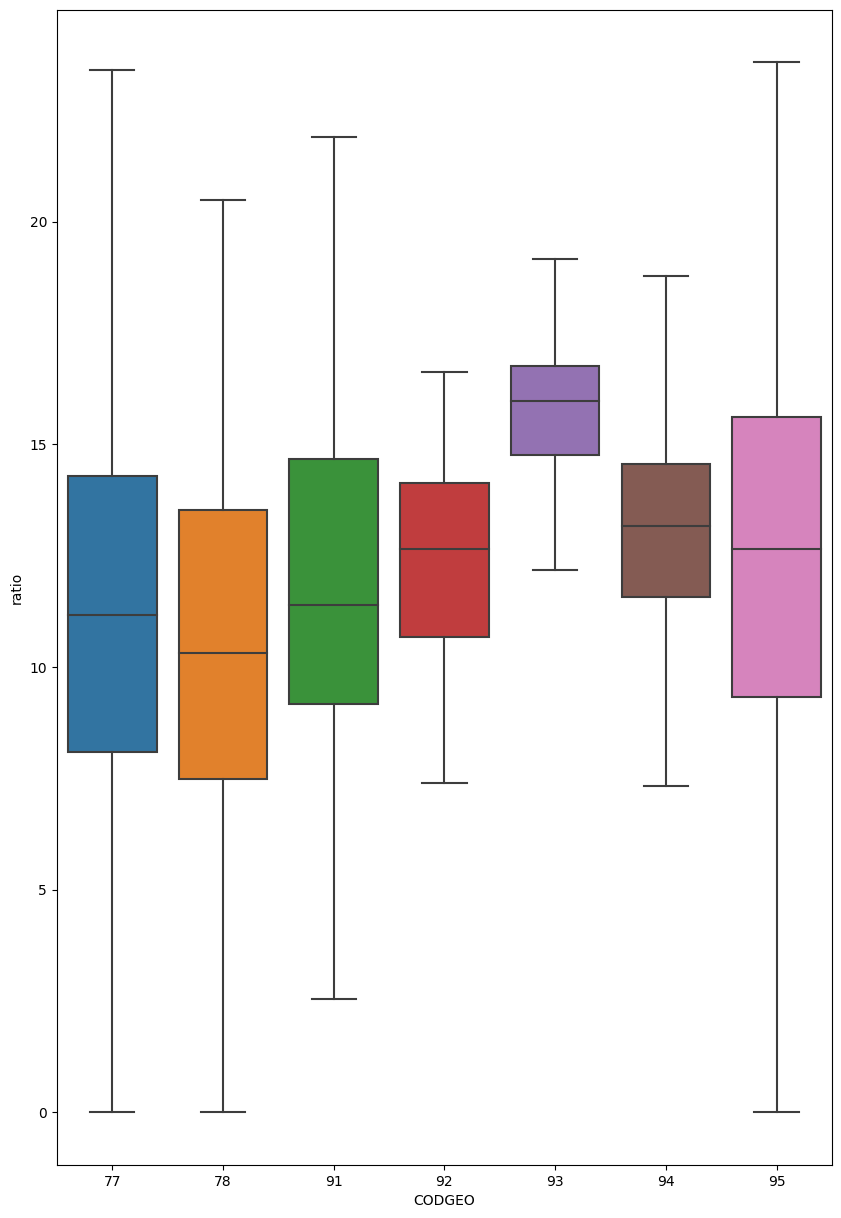

In [9]:
fig_dims = (10, 15)
fig, ax = plt.subplots(figsize=fig_dims)

sns.boxplot(x="CODGEO", y="ratio", data=df, showfliers=False);

- Dans le 93, on peut voir que le nombre de naissances par habitants est beaucoup plus élevé que dans les autres départements

- A part dans le 93, 50% des villes dans les autres départements ont un ratio compris entre 8 et 15 naissances pour 1000 habitants, en France, le taux de natalité est de 10,9 pour mille.